In [16]:
import xgboost as xgb
import pandas as pd

In [17]:
train_data = pd.read_csv("../data/train.tsv", delimiter='\t')
test_data = pd.read_csv("../data/test.tsv", delimiter='\t')

In [18]:
train_x, train_y = train_data.iloc[:, 3:22], train_data["LeagueIndex"]-1
test_x = test_data.iloc[:, 2:21]

In [19]:
dtrain = xgb.DMatrix(train_x, label=train_y)
test_x = test_data.iloc[:, 2:21]
dtest = xgb.DMatrix(test_x)

/Users/sugarl/.conda/envs/data_final/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [20]:
param = {'objective': 'multi:softmax', 'num_class': 8, 'eval_metric': 'mlogloss'}

In [21]:
bst = xgb.train(param, dtrain)

In [22]:
pred = bst.predict(dtest) + 1

In [23]:
from sklearn.metrics import accuracy_score

score = accuracy_score(train_y, pred)
print('score:{0:.4f}'.format(score))

ValueError: Found input variables with inconsistent numbers of samples: [1697, 1698]

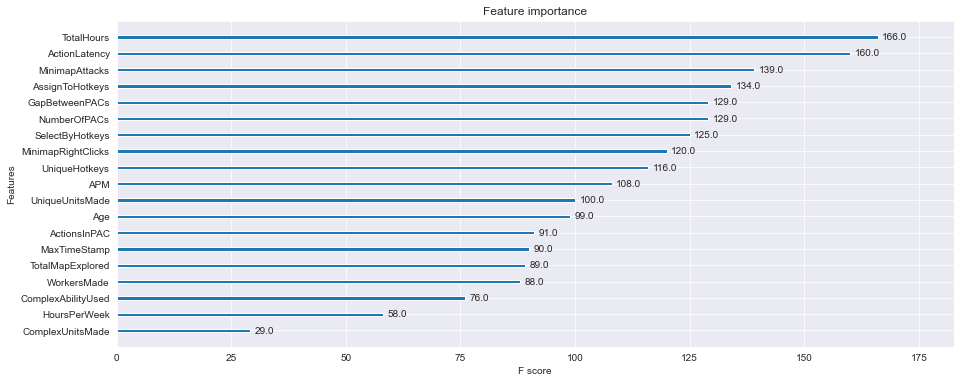

In [24]:
import matplotlib.pyplot as plt
#可視化
plt.rcParams["figure.figsize"] = (15, 6)
xgb.plot_importance(bst)
plt.show()

In [ ]:
import csv

y_pred = bst.predict(dtest) + 1

with open("../result/lightgbm_test.csv", "w") as csv_file:
    for pred_low, test_id in zip(y_pred, test_data['Unnamed: 0']):
        writer = csv.writer(csv_file)
        low = [test_id, int(pred_low+1)]
        writer.writerow(low)

    csv_file.close()


In [1]:
import numpy as np
import seaborn as sns
df = sns.load_dataset('tips')
X = df['total_bill'].values.reshape(-1, 1)
y = df['tip'].values

In [3]:
print(X.shape)
print(y.shape)

(244, 1)
(244,)


In [5]:
X

array([[16.99],
       [10.34],
       [21.01],
       [23.68],
       [24.59],
       [25.29],
       [ 8.77],
       [26.88],
       [15.04],
       [14.78],
       [10.27],
       [35.26],
       [15.42],
       [18.43],
       [14.83],
       [21.58],
       [10.33],
       [16.29],
       [16.97],
       [20.65],
       [17.92],
       [20.29],
       [15.77],
       [39.42],
       [19.82],
       [17.81],
       [13.37],
       [12.69],
       [21.7 ],
       [19.65],
       [ 9.55],
       [18.35],
       [15.06],
       [20.69],
       [17.78],
       [24.06],
       [16.31],
       [16.93],
       [18.69],
       [31.27],
       [16.04],
       [17.46],
       [13.94],
       [ 9.68],
       [30.4 ],
       [18.29],
       [22.23],
       [32.4 ],
       [28.55],
       [18.04],
       [12.54],
       [10.29],
       [34.81],
       [ 9.94],
       [25.56],
       [19.49],
       [38.01],
       [26.41],
       [11.24],
       [48.27],
       [20.29],
       [13.81],
       [